In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def potential(m, w, c3, c4, x):
    return 0.5 * m * (w ** 2) * (x ** 2) * (1. + c3 * x + c4 * x ** 2)

mass = 1.  # in A.U.
kB = 3.166811965 * 10 ** (-6)  # in A.U.
hbar = 1.0  # in A.U.

# c3, c4 = 0.001, 0.00001
c4 = 0.00001

#   HARMONIC TRAP FREQUENCY, hbar * w0 = 3 meV
w0 = 0.003 * 0.0367493 # in AU
hw = hbar * w0

x0_factor = 1 #95.25

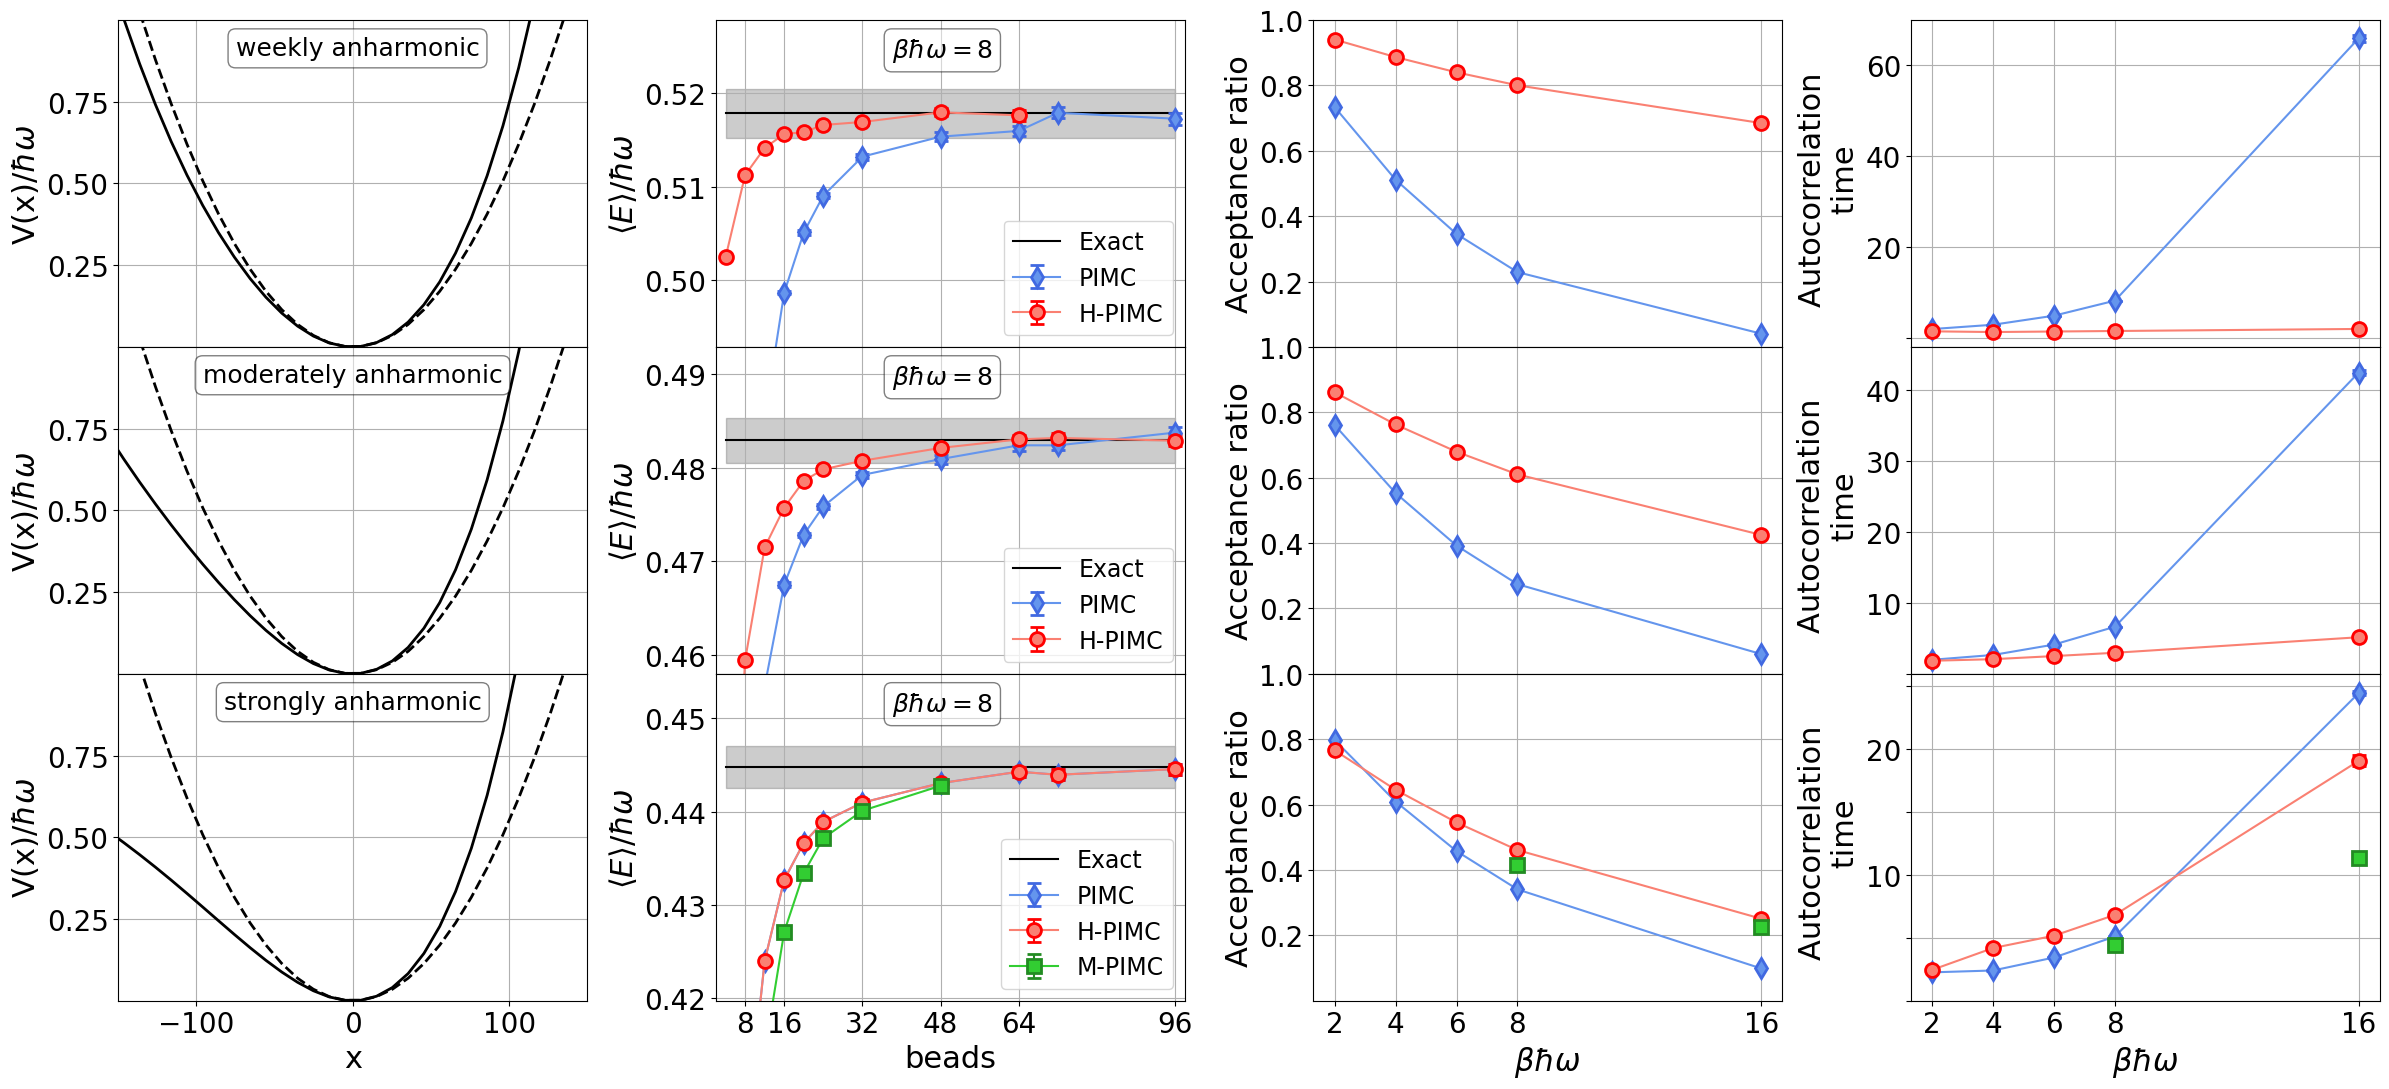

In [4]:
def main():
    c3 = 0.0025
    c3p = 'p'+str(c3)[2:]
    bhw = 8

    plt.figure(figsize = (24, 11))

    df_avgE = np.loadtxt('../data/Fig_3/Weak_Anharmonicity/Eavg.txt', delimiter=' ')
    avgE_dict = {}
    for i in range(len(df_avgE)):
                avgE_dict[int(df_avgE[i, 0])] = df_avgE[i, 1]

    plt.subplot(3, 4, 1)
    plt.text(0.25, 0.95, f'weekly anharmonic', transform=plt.gca().transAxes, fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
    xvals = np.linspace(-500, 500, 100)
    y1 = potential(mass, w0, c3, c4, xvals)
    plt.plot(xvals/x0_factor, y1/hw, linewidth=2, color='k')#, label='Full potential')
    y2 = 0.5 * mass * (w0 * xvals)**2
    plt.plot(xvals/x0_factor, y2/hw, '--', linewidth=2, color='k')#, label='Harmonic approximation')

    stg_acc = np.loadtxt('../data/Fig_3/Weak_Anharmonicity/StagingAcceptanceRatio.txt', delimiter=',', skiprows=1)
    plt.subplot(3, 4, 3)
    plt.plot(stg_acc[:,0], stg_acc[:,1], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2)
    plt.plot(stg_acc[:,0], stg_acc[:,2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2)

    plt.subplot(3, 4, 4)
    df_pEpimc = np.loadtxt('../data/Fig_3/Weak_Anharmonicity/EnergyAutocorrelationTime_PIMC.txt', delimiter=',', skiprows=1)
    plt.errorbar(df_pEpimc[:,0], df_pEpimc[:,1], yerr=df_pEpimc[:,2], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label='PIMC')

    df_pEmpimc = np.loadtxt('../data/Fig_3/Weak_Anharmonicity/EnergyAutocorrelationTime_HPIMC.txt', delimiter=',', skiprows=1)
    plt.errorbar(df_pEmpimc[:,0], df_pEmpimc[:,1], yerr=df_pEmpimc[:,2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label='H-PIMC')
    plt.yticks([0, 20, 40, 60], labels=['', '20', '40', '60'])

    plt.subplot(3, 4, 2)
    plt.text(0.375, 0.95, f'$\\beta \\hbar \\omega = 8$', transform=plt.gca().transAxes, fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
    df_pimc = np.loadtxt('../data/Fig_3/Weak_Anharmonicity/AverageEnergy_PIMC_bhw_8.txt', delimiter=',', skiprows=1)
    df_hpimc = np.loadtxt('../data/Fig_3/Weak_Anharmonicity/AverageEnergy_HPIMC_bhw_8.txt', delimiter=',', skiprows=1)
    nbeads = np.copy(df_pimc[:,0])
    plt.plot(nbeads, [avgE_dict[bhw]]*len(nbeads), '-', color='k', label='Exact') #label='$\\langle E \\rangle_{exact}$')
    plt.errorbar(df_pimc[:,0], df_pimc[:,1], yerr=df_pimc[:,2], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'PIMC')
    plt.errorbar(df_hpimc[:,0], df_hpimc[:,1], yerr=df_hpimc[:,2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
    eavg = avgE_dict[bhw]
    plt.fill_between(nbeads, [eavg*0.995]*len(nbeads), [eavg*1.005]*len(nbeads), color='k', alpha=0.2)
    plt.ylim(eavg-0.025, eavg+0.01)
    plt.xlim(2,98)
    plt.xticks([8, 16, 32, 48, 64, 96], labels=[])
    plt.legend(fontsize=17, loc='lower right')

#======================================================================================================
    c3 = 0.0045
    c3p = 'p'+str(c3)[2:]

    df_avgE = np.loadtxt('../data/Fig_3/Moderate_Anharmonicity/Eavg.txt', delimiter=' ')
    avgE_dict = {}
    for i in range(len(df_avgE)):
                avgE_dict[int(df_avgE[i, 0])] = df_avgE[i, 1]

    plt.subplot(3, 4, 5)
    plt.text(0.18, 0.95, f'moderately anharmonic', transform=plt.gca().transAxes, fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
    xvals = np.linspace(-500, 500, 100)
    y1 = potential(mass, w0, c3, c4, xvals)
    plt.plot(xvals/x0_factor, y1/hw, linewidth=2, color='k')#, label='Full potential')
    y2 = 0.5 * mass * (w0 * xvals)**2
    plt.plot(xvals/x0_factor, y2/hw, '--', linewidth=2, color='k')#, label='Harmonic approximation')

    stg_acc = np.loadtxt('../data/Fig_3/Moderate_Anharmonicity/StagingAcceptanceRatio.txt', delimiter=',', skiprows=1)
    plt.subplot(3, 4, 7)
    plt.plot(stg_acc[:,0], stg_acc[:,1], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2)
    plt.plot(stg_acc[:,0], stg_acc[:,2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2)

    plt.subplot(3, 4, 8)
    df_pEpimc = np.loadtxt('../data/Fig_3/Moderate_Anharmonicity/EnergyAutocorrelationTime_PIMC.txt', delimiter=',', skiprows=1)
    plt.errorbar(df_pEpimc[:,0], df_pEpimc[:,1], yerr=df_pEpimc[:,2], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label='PIMC')
    plt.ylim(0, 46)
    plt.yticks([0, 10, 20, 30, 40], labels=['', '10', '20', '30', '40'])

    df_pEmpimc = np.loadtxt('../data/Fig_3/Moderate_Anharmonicity/EnergyAutocorrelationTime_HPIMC.txt', delimiter=',', skiprows=1)
    plt.errorbar(df_pEmpimc[:,0], df_pEmpimc[:,1], yerr=df_pEmpimc[:,2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label='H-PIMC')

    plt.subplot(3, 4, 6)
    plt.text(0.375, 0.95, f'$\\beta \\hbar \\omega = 8$', transform=plt.gca().transAxes, fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
    df_pimc = np.loadtxt('../data/Fig_3/Moderate_Anharmonicity/AverageEnergy_PIMC_bhw_8.txt', delimiter=',', skiprows=1)
    df_hpimc = np.loadtxt('../data/Fig_3/Moderate_Anharmonicity/AverageEnergy_HPIMC_bhw_8.txt', delimiter=',', skiprows=1)
    nbeads = np.copy(df_pimc[:,0])
    plt.plot(nbeads, [avgE_dict[bhw]]*len(nbeads), '-', color='k', label='Exact') #label='$\\langle E \\rangle_{exact}$')
    plt.errorbar(df_pimc[:,0], df_pimc[:,1], yerr=df_pimc[:,2], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'PIMC')
    plt.errorbar(df_hpimc[:,0], df_hpimc[:,1], yerr=df_hpimc[:,2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
    eavg = avgE_dict[bhw]
    plt.fill_between(nbeads, [eavg*0.995]*len(nbeads), [eavg*1.005]*len(nbeads), color='k', alpha=0.2)
    plt.ylim(eavg-0.025, eavg+0.01)
    plt.xlim(2,98)
    plt.xticks([8, 16, 32, 48, 64, 96], labels=[])
    plt.legend(fontsize=17, loc='lower right')
#======================================================================================================
    c3 = 0.0055
    c3p = 'p'+str(c3)[2:]

    df_avgE = np.loadtxt('../data/Fig_3/Strong_Anharmonicity/Eavg.txt', delimiter=' ')
    avgE_dict = {}
    for i in range(len(df_avgE)):
                avgE_dict[int(df_avgE[i, 0])] = df_avgE[i, 1]

    plt.subplot(3, 4, 9)
    plt.text(0.225, 0.95, f'strongly anharmonic', transform=plt.gca().transAxes, fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
    xvals = np.linspace(-500, 500, 100)
    y1 = potential(mass, w0, c3, c4, xvals)
    plt.plot(xvals/x0_factor, y1/hw, linewidth=2, color='k')#, label='Full potential')
    y2 = 0.5 * mass * (w0 * xvals)**2
    plt.plot(xvals/x0_factor, y2/hw, '--', linewidth=2, color='k')#, label='Harmonic approximation')

    stg_acc = np.loadtxt('../data/Fig_3/Strong_Anharmonicity/StagingAcceptanceRatio.txt', delimiter=',', skiprows=1)
    plt.subplot(3, 4, 11)
    plt.plot(stg_acc[:,0], stg_acc[:,1], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2)
    plt.plot(stg_acc[:,0], stg_acc[:,2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2)
    dff2 = np.loadtxt('../data/Fig_3/Strong_Anharmonicity/MPIMC_OptimizedHarmonicDomain/StagingAcceptanceRatio.txt', delimiter=',', skiprows=1)
    plt.plot(dff2[:,0], dff2[:,1], linestyle='None', marker='s', markersize=10, color='limegreen', markerfacecolor='limegreen', markeredgecolor='forestgreen', markeredgewidth=2)

    plt.subplot(3, 4, 12)
    df_pEpimc = np.loadtxt('../data/Fig_3/Strong_Anharmonicity/EnergyAutocorrelationTime_PIMC.txt', delimiter=',', skiprows=1)
    plt.errorbar(df_pEpimc[:,0], df_pEpimc[:,1], yerr=df_pEpimc[:,2], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label='PIMC')

    df_pEhpimc = np.loadtxt('../data/Fig_3/Strong_Anharmonicity/EnergyAutocorrelationTime_HPIMC.txt', delimiter=',', skiprows=1)
    plt.errorbar(df_pEhpimc[:,0], df_pEhpimc[:,1], yerr=df_pEhpimc[:,2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label='H-PIMC')
    plt.ylim(0, 26)
    plt.yticks([0, 5, 10, 15, 20, 25], labels=['', '', '10', '', '20', ''])

    dff1 = np.loadtxt('../data/Fig_3/Strong_Anharmonicity/MPIMC_OptimizedHarmonicDomain/EnergyAutocorrelationTime_MPIMC.txt', delimiter=',', skiprows=1)
    plt.errorbar(dff1[:,0], dff1[:,1], yerr=dff1[:,2], linestyle='None', marker='s', markersize=10, color='limegreen', markerfacecolor='limegreen', markeredgecolor='forestgreen', markeredgewidth=2, ecolor = 'forestgreen', capsize=5)

    plt.subplot(3, 4, 10)
    plt.text(0.375, 0.95, f'$\\beta \\hbar \\omega = 8$', transform=plt.gca().transAxes, fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
    df_pimc = np.loadtxt('../data/Fig_3/Strong_Anharmonicity/AverageEnergy_PIMC_bhw_8.txt', delimiter=',', skiprows=1)
    df_hpimc = np.loadtxt('../data/Fig_3/Strong_Anharmonicity/AverageEnergy_PIMC_bhw_8.txt', delimiter=',', skiprows=1)
    df_mpimc = np.loadtxt('../data/Fig_3/Strong_Anharmonicity/MPIMC_OptimizedHarmonicDomain/AverageEnergy_MPIMC_bhw_8_Optimized_HD.txt', delimiter=',', skiprows=1)
    nbeads = np.copy(df_pimc[:,0])
    plt.plot(nbeads, [avgE_dict[bhw]]*len(nbeads), '-', color='k', label='Exact') #label='$\\langle E \\rangle_{exact}$')
    plt.errorbar(df_pimc[:,0], df_pimc[:,1], yerr=df_pimc[:,2], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'PIMC')
    plt.errorbar(df_hpimc[:,0], df_hpimc[:,1], yerr=df_hpimc[:,2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
    plt.errorbar(df_mpimc[:-2,0], df_mpimc[:-2,1], yerr=df_mpimc[:-2,2], linestyle='-', marker='s', markersize=10, color='limegreen', markerfacecolor='limegreen', markeredgecolor='forestgreen', markeredgewidth=2, ecolor = 'forestgreen', capsize=5, label=f'M-PIMC')
    eavg = avgE_dict[bhw]
    plt.fill_between(nbeads, [eavg*0.995]*len(nbeads), [eavg*1.005]*len(nbeads), color='k', alpha=0.2)
    plt.ylim(eavg-0.025, eavg+0.01)
    plt.xlim(2,98)
    plt.xticks([8, 16, 32, 48, 64, 96])
    plt.legend(fontsize=17, loc='lower right')

    for ii in [1, 5, 9]:
        plt.subplot(3, 4, ii)
        plt.xlim(-150, 150)
        if ii ==1 or ii == 5:
            plt.xticks([-100, 0, 100], labels=[])
        plt.ylim(0, 1)
        plt.yticks([0.25, 0.5, 0.75])
        if ii == 9:
            plt.xlabel('x', fontsize = 22)
            plt.xticks([-100, 0, 100])
        plt.ylabel('V(x)/$\\hbar \\omega$', fontsize = 22)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.grid(True)

    for ii in [3, 7, 11]:
        plt.subplot(3, 4, ii)
        plt.ylim(0,1)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.ylabel('Acceptance ratio', fontsize=22)
        if ii != 11:
            plt.xticks([2, 4, 6, 8, 16], labels=[])
        if ii == 11:
            plt.xlabel('$\\beta \\hbar \\omega$', fontsize=22)
            plt.xticks([2, 4, 6, 8, 16])
        plt.yticks([0.2, 0.4, 0.6, 0.8, 1])
        plt.grid(True)

    for ii in [4, 8, 12]:
        plt.subplot(3, 4, ii)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.ylabel('Autocorrelation \n time', fontsize=22)
        if ii != 12:
            plt.xticks([2, 4, 6, 8, 16], labels=[])
        if ii == 12:
            plt.xlabel('$\\beta \\hbar \\omega$', fontsize=22)
            plt.xticks([2, 4, 6, 8, 16])
        plt.grid(True)

    for ii in [2, 6, 10]:
        plt.subplot(3, 4, ii)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.ylabel('$\\langle E \\rangle / \\hbar \\omega$', fontsize=22)
        if ii == 10:
            plt.xlabel('beads', fontsize=22)
        plt.grid(True)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0)
    plt.savefig('../figures/Fig3.svg')

if __name__ == '__main__':
    main()